In [1]:
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [76]:
plt.rcParams.update({'font.size': 12})
stations = ['muOsna', 'wernig', 'braunl', 'redlen']
names = ['Münster-Osnabrück', 'Wernigerode', 'Braunlage', 'Redlendorf']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']

In [77]:
def set_color_boxplot(boxplot, positions, color):
    
    for position in positions:
        plt.setp(boxplot['boxes'][position], color=color)
        plt.setp(boxplot['whiskers'][position*2], color=color)
        plt.setp(boxplot['whiskers'][position*2+1], color=color)
        plt.setp(boxplot['caps'][position*2], color=color)
        plt.setp(boxplot['caps'][position*2+1], color=color)
        plt.setp(boxplot['medians'][position], color=color)
        plt.setp(boxplot['fliers'][position], color=color)

    return

### DWD's results

In [78]:
## Classification
log_muOsna_ets = 0.27742693493905146
log_wernig_ets = 0.2820860142228241
log_braunl_ets = 0.6577970297029703
log_redlen_ets = 0.40700749228735145

In [79]:
## Regression
glm_muOsna_skill = 0.3020233896417299
glm_wernig_skill = 0.3742618110236221
glm_braunl_skill = 0.18466268764695248
glm_redlen_skill = 0.33502216592780243

## Rain histograms

In [80]:
data_path = '/p/home/jusers/rojascampos1/juwels/MyProjects/PROJECT_deepacf/deeprain/rojascampos1/post_processing_for_precipitation/data/'

In [81]:
precipitation = []
rain_percentage = []

for s in stations:
    trn_y = np.load(data_path + s + '/trn_y.npy')
    tst_y = np.load(data_path + s + '/tst_y.npy')
    y = np.concatenate([trn_y, tst_y])
    
    days_with_rain = np.sum(np.array(y >= 0.1, dtype=int))
    total_days = len(y)
    rain_percentage.append((days_with_rain / total_days)*100)
    print(s, 'rain percentage =', days_with_rain / total_days)
    precipitation.append(y)

muOsna rain percentage = 0.10649895178197065
wernig rain percentage = 0.09481418680231736
braunl rain percentage = 0.17473005188613097
redlen rain percentage = 0.17668386556965557


In [82]:
rain_only = True

if rain_only:
    
    precipitation = [y[y>0] for y in precipitation]
    y_lim = 350
    
else:
    y_lim = 7000

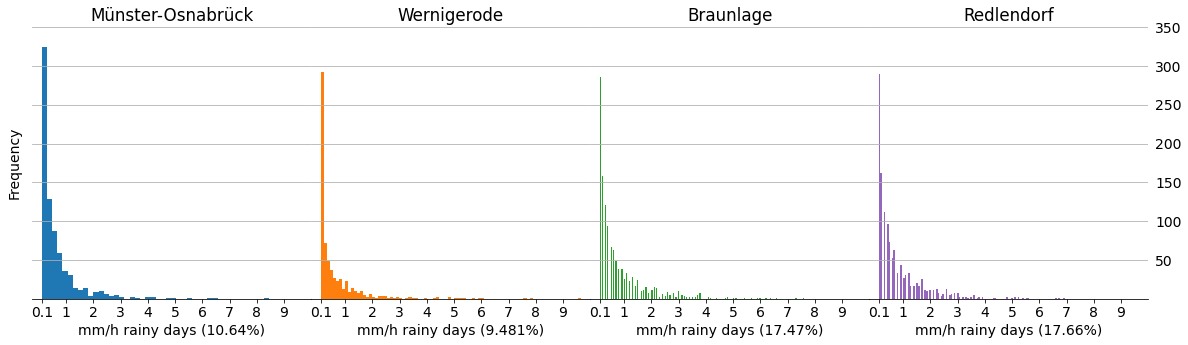

In [112]:
bins = 170

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 4, figsize=(20,5))

for i in range(len(names)):
    

    ax[i].set_title(names[i])
    ax[i].hist(precipitation[i], bins=bins, alpha=1, color=colors[i])
    ax[i].set_ylim([0.1,y_lim])
    ax[i].set_xlim([-.25,10])
    
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
#     
#     ax[i].get_yaxis().set_visible(False)
    
    ax[i].yaxis.grid(True)
    x_tiqs = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    x_tiqs_labels = [str(t) for t in x_tiqs]
    
    ax[i].set_xticks(x_tiqs)
    ax[i].set_xticklabels(x_tiqs_labels)
    
    ax[i].set_xlabel('mm/h rainy days (' +str(rain_percentage[i])[0:5]+'%)')
    
    
    if i == 3:
        ax[i].yaxis.tick_right()
        
    else:
        ax[i].yaxis.set_ticklabels([])

    ax[i].yaxis.set_ticks_position('none')

ax[0].set_ylabel('Frequency')


plt.subplots_adjust(wspace=0, hspace=0)
fig.show()
fig.savefig('figures/precipitation_distribution.png')

### Architecture exploration

In [113]:
plt.rcParams.update({'font.size': 12})

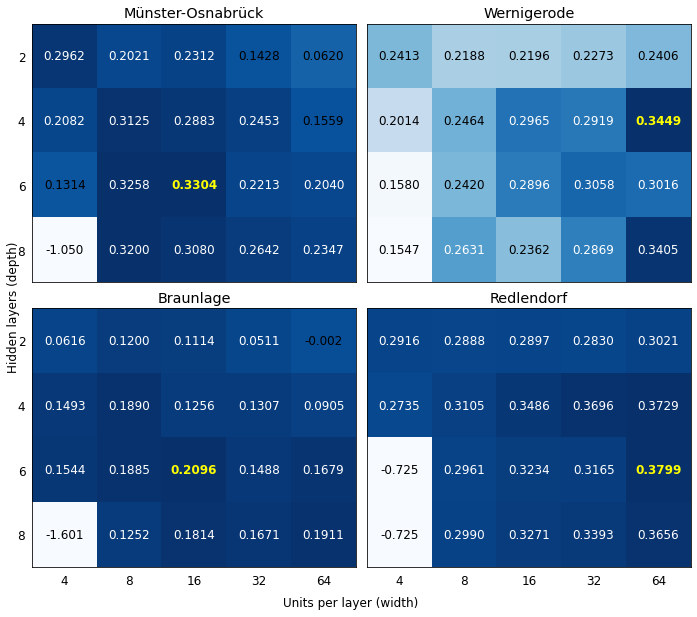

In [116]:
fig, ax = plt.subplots(2,2,figsize=(12, 10))

depth = [2, 4, 6, 8]
width  = [4,8,16,32,64]


for i in range(2):
    for j in range(2):
        
        station = np.reshape(stations, (2,2))[i][j]
        name = np.reshape(names, (2,2))[i][j]

        arch_exploration = np.load('architecture_exploration/arch_exploration_'+station+'.npy')
        medians = np.median(arch_exploration, axis=2)

        ax[i][j].set_title(name)
        ax[i][j].imshow(medians, cmap='Blues')

        ax[i][j].yaxis.set_ticklabels([])
        ax[i][j].xaxis.set_ticklabels([])
        ax[i][j].yaxis.set_ticks_position('none')
        ax[i][j].xaxis.set_ticks_position('none')


        medians_max = np.max(medians)
        th = np.mean(medians)


        # Loop over data dimensions and create text annotations.
        for k in range(len(depth)):
            for l in range(len(width)):
                if medians[k,l] <= th:
                    text = ax[i][j].text(l, k, str(medians[k, l])[0:6],ha="center", va="center", color="Black")
                elif (medians[k,l] > th and medians[k,l] < medians_max): 
                    text = ax[i][j].text(l, k, str(medians[k, l])[0:6],ha="center", va="center", color="White")
                elif (medians[k,l] == medians_max):
                    text = ax[i][j].text(l, k, str(medians[k, l])[0:6],ha="center", va="center", color="Yellow", fontweight=1000)
                

# Show all ticks and label them with the respective list entries
ax[0][0].set_yticks(np.arange(len(depth)))
ax[0][0].set_yticklabels([str(d) for d in depth])
ax[1][0].set_yticks(np.arange(len(depth)))
ax[1][0].set_yticklabels([str(d) for d in depth])
ax[1][1].set_xticks(np.arange(len(width)))
ax[1][1].set_xticklabels([str(w) for w in width])
ax[1][0].set_xticks(np.arange(len(width)))
ax[1][0].set_xticklabels([str(w) for w in width])

fig.text(0.5, 0.07, 'Units per layer (width)', ha='center')
fig.text(0.11, 0.4, 'Hidden layers (depth)', ha='center', rotation=90)

plt.subplots_adjust(wspace=0.0001, hspace=0.1)
fig.show()
fig.savefig('figures/architecture_exploration.png')

# Specific models

### Rain / no rain classification

In [86]:
with open('classification/results_classification.json') as f:
    results_classification = json.load(f)

In [87]:
ann_ets_muOsna = np.array(results_classification['specific']['muOsna']['ets'])
ann_ets_wernig = np.array(results_classification['specific']['wernig']['ets'])
ann_ets_braunl = np.array(results_classification['specific']['braunl']['ets'])
ann_ets_redlen = np.array(results_classification['specific']['redlen']['ets'])

In [88]:
cl_mean = np.median(np.concatenate([ann_ets_muOsna, ann_ets_wernig, ann_ets_braunl, ann_ets_redlen]))
print(cl_mean)

0.4155667752820392


In [89]:
print('Median ets_muOsna =', np.median(ann_ets_muOsna))
print('Median ets_wernig =', np.median(ann_ets_wernig))
print('Median ets_braun =', np.median(ann_ets_braunl))
print('Median ets_redlen =', np.median(ann_ets_redlen))

Median ets_muOsna = 0.39019075268292547
Median ets_wernig = 0.3453197913807304
Median ets_braun = 0.6006841564315715
Median ets_redlen = 0.43283349733437115


In [90]:
print(np.median(ann_ets_muOsna) > log_muOsna_ets)
print(np.median(ann_ets_wernig) > log_wernig_ets)
print(np.median(ann_ets_braunl) > log_braunl_ets)
print(np.median(ann_ets_redlen) > log_redlen_ets)

True
True
False
True


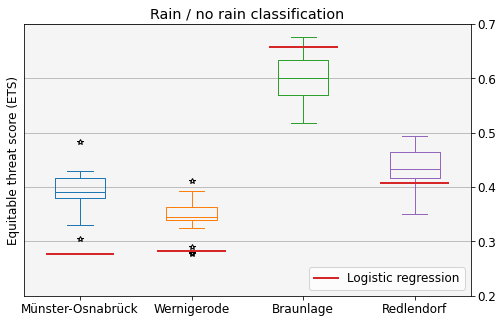

In [91]:
fig, ax = plt.subplots(figsize=(8,5))

b = ax.boxplot(np.stack([ann_ets_muOsna, ann_ets_wernig, ann_ets_braunl, ann_ets_redlen]).T, flierprops={'marker':'*'})

ax.set_title('Rain / no rain classification')

ax.set_ylim([0.2 , 0.7])

set_color_boxplot(b, [0], colors[0])
set_color_boxplot(b, [1], colors[1])
set_color_boxplot(b, [2], colors[2])
set_color_boxplot(b, [3], colors[3])

ax.yaxis.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xticklabels(names)

## Makes a line for the GLM skill score
ax.axhline(y=log_muOsna_ets, xmin=0.05, xmax=.20, linewidth=2, color='#d62728')
ax.axhline(y=log_wernig_ets, xmin=.30, xmax=.45, linewidth=2, color='#d62728')
ax.axhline(y=log_braunl_ets, xmin=0.55, xmax=.70, linewidth=2, color='#d62728')
ax.axhline(y=log_redlen_ets, xmin=0.80, xmax=.95, linewidth=2, color='#d62728')


ax.set_ylabel('Equitable threat score (ETS)')
ax.yaxis.tick_right()

lines = [matplotlib.lines.Line2D([0], [0], color='#d62728', linewidth=2, linestyle='-')]
labels = ['Logistic regression']
ax.legend(lines, labels, loc='lower right')

fig.show()
fig.savefig('figures/classification.png')

### Rain amount prediction

In [92]:
with open('regression/results_regression_specific.json') as f: ### ojo
    results_regression = json.load(f)

#### Skill score

In [93]:
ann_skill_muOsna = np.array([results_regression['specific']['muOsna'][str(r)]['skill'] for r in np.arange(20)])
ann_skill_wernig = np.array([results_regression['specific']['wernig'][str(r)]['skill'] for r in np.arange(20)])
ann_skill_braunl = np.array([results_regression['specific']['braunl'][str(r)]['skill'] for r in np.arange(20)])
ann_skill_redlen = np.array([results_regression['specific']['redlen'][str(r)]['skill'] for r in np.arange(20)])

In [94]:
rg_mean = np.median(np.concatenate([ann_skill_muOsna, ann_skill_wernig, ann_skill_braunl, ann_skill_redlen]))
print(rg_mean)

0.3158000335356276


In [95]:
print('Median skill_muOsna =', np.median(ann_skill_muOsna))
print('Median skill_wernig =', np.median(ann_skill_wernig))
print('Median skill_braunl =', np.median(ann_skill_braunl))
print('Median skill_redlen =', np.median(ann_skill_redlen))

Median skill_muOsna = 0.34611100798217936
Median skill_wernig = 0.280265748031496
Median skill_braunl = 0.2096219931271478
Median skill_redlen = 0.44185402153261555


In [96]:
print(np.median(ann_skill_muOsna) > glm_muOsna_skill)
print(np.median(ann_skill_wernig) > glm_wernig_skill)
print(np.median(ann_skill_braunl) > glm_braunl_skill)
print(np.median(ann_skill_redlen) > glm_redlen_skill)

True
False
True
True


#### Plot

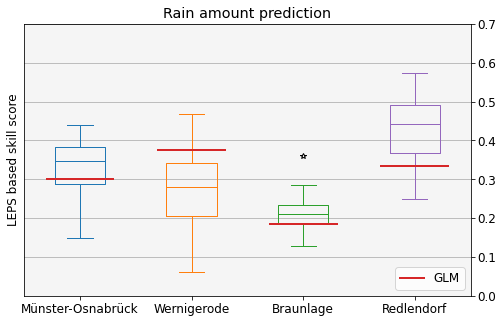

In [97]:
fig, ax = plt.subplots(figsize=(8,5))

b = ax.boxplot(np.stack([ann_skill_muOsna, ann_skill_wernig, ann_skill_braunl, ann_skill_redlen]).T, flierprops={'marker':'*'})
ax.set_ylim([0 , 0.7])

ax.set_title('Rain amount prediction')
set_color_boxplot(b, [0], colors[0])
set_color_boxplot(b, [1], colors[1])
set_color_boxplot(b, [2], colors[2])
set_color_boxplot(b, [3], colors[3])

ax.yaxis.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xticklabels(names)

## Makes a line for the GLM skill score
ax.axhline(y=glm_muOsna_skill, xmin=0.05, xmax=.20, linewidth=2, color='#d62728')
ax.axhline(y=glm_wernig_skill, xmin=0.30, xmax=.45, linewidth=2, color='#d62728')
ax.axhline(y=glm_braunl_skill, xmin=0.55, xmax=.70, linewidth=2, color='#d62728')
ax.axhline(y=glm_redlen_skill, xmin=0.80, xmax=.95, linewidth=2, color='#d62728')

ax.set_ylabel('LEPS based skill score')
ax.yaxis.tick_right()

lines = [matplotlib.lines.Line2D([0], [0], color='#d62728', linewidth=2, linestyle='-')]
labels = ['GLM']
ax.legend(lines, labels, loc='lower right')

fig.show()
fig.savefig('figures/regression.png')

# General models

### General model: rain / no rain classification

In [98]:
with open('general_model/results_classification_general.json') as f: ### ojo
    general_results_classification = json.load(f)

#### Skill score

In [99]:
g_ets_muOsna = np.array(general_results_classification['muOsna']['ets'])
g_ets_braunl = np.array(general_results_classification['braunl']['ets'])
g_ets_wernig = np.array(general_results_classification['wernig']['ets'])
g_ets_redlen = np.array(general_results_classification['redlen']['ets'])

In [100]:
g_cl_mean = np.median(np.concatenate([g_ets_muOsna, g_ets_wernig, g_ets_braunl, g_ets_redlen]))
print(g_cl_mean)

0.43218932895662626


In [101]:
print('Median generalETSmuOsna =', np.median(g_ets_muOsna))
print('Median generalETSwernig =', np.median(g_ets_wernig))
print('Median generalETSbraunl =', np.median(g_ets_braunl))
print('Median generalETSredlen =', np.median(g_ets_redlen))

Median generalETSmuOsna = 0.3683399666195916
Median generalETSwernig = 0.38828595598961746
Median generalETSbraunl = 0.6204668979039205
Median generalETSredlen = 0.43978137707384424


In [102]:
print(np.median(g_ets_muOsna) > np.median(ann_ets_muOsna))
print(np.median(g_ets_wernig) > np.median(ann_ets_wernig))
print(np.median(g_ets_braunl) > np.median(ann_ets_braunl))
print(np.median(g_ets_redlen) > np.median(ann_ets_redlen))

False
True
True
True



#### Plot

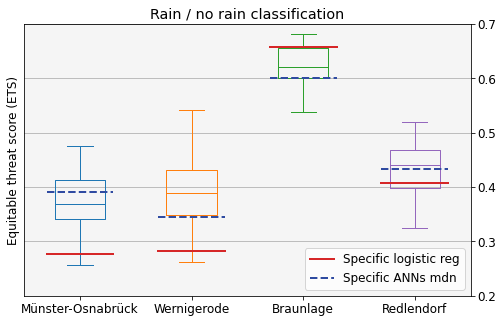

In [103]:
fig, ax = plt.subplots(figsize=(8,5))

b = ax.boxplot(np.stack([g_ets_muOsna, g_ets_wernig, g_ets_braunl, g_ets_redlen]).T, flierprops={'marker':'*'})

ax.set_title('Rain / no rain classification')

ax.set_ylim([0.2 , 0.7])


set_color_boxplot(b, [0], colors[0])
set_color_boxplot(b, [1], colors[1])
set_color_boxplot(b, [2], colors[2])
set_color_boxplot(b, [3], colors[3])

lsss = 'dashed'
ax.yaxis.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xticklabels(names)

## Makes a line for the GLM skill score
ax.axhline(y=log_muOsna_ets, xmin=0.05, xmax=.20, linewidth=2, color='#d62728')
ax.axhline(y=log_wernig_ets, xmin=0.30, xmax=.45, linewidth=2, color='#d62728')
ax.axhline(y=log_braunl_ets, xmin=0.55, xmax=.70, linewidth=2, color='#d62728')
ax.axhline(y=log_redlen_ets, xmin=0.80, xmax=.95, linewidth=2, color='#d62728')

bluuu = '#2F4BA1'

alphaaa = 1
## Makes a line for the GLM skill score
ax.axhline(y=np.median(ann_ets_muOsna), xmin=0.05, xmax=.20, linewidth=2, color=bluuu, ls=lsss, alpha=alphaaa)
ax.axhline(y=np.median(ann_ets_wernig), xmin=0.30, xmax=.45, linewidth=2, color=bluuu, ls=lsss, alpha=alphaaa)
ax.axhline(y=np.median(ann_ets_braunl), xmin=0.55, xmax=.70, linewidth=2, color=bluuu, ls=lsss, alpha=alphaaa)
ax.axhline(y=np.median(ann_ets_redlen), xmin=0.80, xmax=.95, linewidth=2, color=bluuu, ls=lsss, alpha=alphaaa)


ax.set_ylabel('Equitable threat score (ETS)')
ax.yaxis.tick_right()


lines = [matplotlib.lines.Line2D([0], [0], color='#d62728', linewidth=2),
         matplotlib.lines.Line2D([0], [0], color=bluuu, linewidth=2, linestyle=lsss)]
labels = ['Specific logistic reg', 'Specific ANNs mdn']
ax.legend(lines, labels, loc='lower right')

fig.show()
fig.savefig('figures/general_classification.png')

### General model: rain amount prediction

In [104]:
with open('general_model/results_regression_general.json') as f: ### ojo
    general_results_regression = json.load(f)

#### Skill score

In [105]:
g_skill_braunl = np.array(general_results_regression['braunl']['skill'])
g_skill_muOsna = np.array(general_results_regression['muOsna']['skill'])
g_skill_wernig = np.array(general_results_regression['wernig']['skill'])
g_skill_redlen = np.array(general_results_regression['redlen']['skill'])

In [106]:
g_rg_mean = np.median(np.concatenate([g_skill_braunl, g_skill_muOsna, g_skill_wernig, g_skill_redlen]))

In [107]:
print('Median generalSKILLmuOsna =', np.median(g_skill_muOsna))
print('Median generalSKILLwernig =', np.median(g_skill_wernig))
print('Median generalSKILLbraunl =', np.median(g_skill_braunl))
print('Median generalSKILLredlen =', np.median(g_skill_redlen))

Median generalSKILLmuOsna = 0.30981993688509374
Median generalSKILLwernig = 0.45004921259842523
Median generalSKILLbraunl = 0.2115210707180321
Median generalSKILLredlen = 0.4087634578847372


In [108]:
print(np.median(g_skill_muOsna) > np.median(ann_skill_muOsna))
print(np.median(g_skill_wernig) > np.median(ann_skill_wernig))
print(np.median(g_skill_braunl) > np.median(ann_skill_braunl))
print(np.median(g_skill_redlen) > np.median(ann_skill_redlen))

False
True
True
False



#### Plot

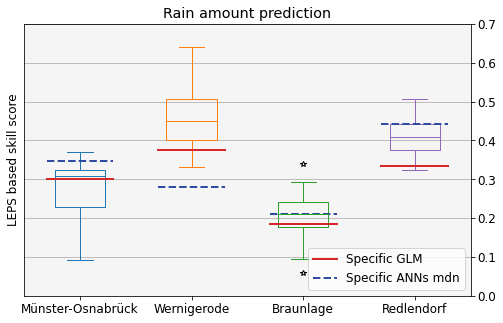

In [109]:
fig, ax = plt.subplots(figsize=(8,5))

b = ax.boxplot(np.stack([g_skill_muOsna, g_skill_wernig, g_skill_braunl, g_skill_redlen]).T, flierprops={'marker':'*'})

ax.set_title('Rain amount prediction')
ax.set_ylim([0 , 0.7])

set_color_boxplot(b, [0], colors[0])
set_color_boxplot(b, [1], colors[1])
set_color_boxplot(b, [2], colors[2])
set_color_boxplot(b, [3], colors[3])

ax.yaxis.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xticklabels(names)

## Makes a line for the GLM skill score
ax.axhline(y=glm_muOsna_skill, xmin=0.05, xmax=.20, linewidth=2, color='#d62728')
ax.axhline(y=glm_wernig_skill, xmin=0.30, xmax=.45, linewidth=2, color='#d62728')
ax.axhline(y=glm_braunl_skill, xmin=0.55, xmax=.70, linewidth=2, color='#d62728')
ax.axhline(y=glm_redlen_skill, xmin=0.80, xmax=.95, linewidth=2, color='#d62728')

bluuu = '#2F4BA1'
alphaaa = 1
## Makes a line for the GLM skill score
ax.axhline(y=np.median(ann_skill_muOsna), xmin=0.05, xmax=.20, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)
ax.axhline(y=np.median(ann_skill_wernig), xmin=0.30, xmax=.45, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)
ax.axhline(y=np.median(ann_skill_braunl), xmin=0.55, xmax=.70, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)
ax.axhline(y=np.median(ann_skill_redlen), xmin=0.80, xmax=.95, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)

ax.set_ylabel('LEPS based skill score')
ax.yaxis.tick_right()


lines = [matplotlib.lines.Line2D([0], [0], color='#d62728', linewidth=2),
         matplotlib.lines.Line2D([0], [0], color=bluuu, linewidth=2, linestyle='dashed')]
labels = ['Specific GLM', 'Specific ANNs mdn']
ax.legend(lines, labels, loc='lower right')

fig.show()
fig.savefig('figures/general_regression.png')